# EccPrior and EccBurst Tutorial
`EccPrior` is an eccentric burst prior that uses `EccBurst` to generate predicted locations of eccentric GW bursts in time-frequency space. `EccBurst` uses equations from L&Y 2017 to estimate the locations of eccentric GW bursts in time-frequency space. This notebook presents the basic usage of classes `EccPrior` and `EccBurst`.

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
%load_ext autoreload

import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ecc_prior.ecc_burst import EccBurst
from ecc_prior.ecc_prior import EccPrior

%matplotlib inline
%autoreload 2

In [3]:
def prior_mapping(tmin, tmax, Mtot, Mc, destar, tstar, fstar):
    '''Creates a 2-D histogram of the prior surface for a given set of meta parameters
       Returns the ts, fs, and surface probabilities'''
    Nf = 300
    Nt = 300

    Fs = np.linspace((fstar-10), (fstar+10), Nf)
    Ts = np.linspace(tmin, tmax, Nt)

    prior_map = np.zeros([Nf, Nt])

    for ii,tt in enumerate(Ts):
        for jj,ff in enumerate(Fs):
            prior_map[jj,ii] = ep.get_prior([[tt,ff]], Mtot, Mc, destar, tstar, fstar)
    
    return Ts, Fs, prior_map

`EccBurst` assumes M = 1 and is in units of M; `EccPrior` works in SI units. Please keep this in mind when establishing both class objects. 

In [4]:
tmin = -1.5 #lower time window bound in seconds
tmax = 1.5 #upper time window bound in seconds
q = 0.6 #mass ratio with convention m2 < m1

eb = EccBurst(q)
ep = EccPrior(tmin, tmax)

As mentioned earlier, `EccPrior` uses `EccBurst` to generate bursts within a specified time window, but can be also used on its own. To generate a set of bursts for a source, it is important to establish `tstar`, `fstar`, `destar`.  These three parameters denote the location of the "anchor burst" in time-frequency space. The anchor burst is a burst that is used to find the locations of the other bursts in time-frequency space. Values of destar > 0.3 will cause the L&Y 2017 equations to break down.

In [5]:
tstar = 0 #sec
fstar = 40 #Hz
destar = 0.1 #1-e, where e is the eccentricity
Mtot = 50 #total mass in solar masses
Mchirp = q**(3/5)/(1+q)**(6/5)*Mtot # chirp mass in solar masses

#To use EccBurst all quantities must be converted to units of total mass
GMsun = 1.32712440018e20  # m^3/s^2
c = 299792458 # m/s
Tsun = GMsun / c**3
sec2M = Mtot/Tsun #sec to M

bursts = eb.get_all_bursts(tstar*sec2M, fstar/sec2M, destar, tmin*sec2M, tmax*sec2M)
bursts = np.array(bursts).T

Plotting the burst locations in the time window gives a sense of the frequency evolution of the bursts.

Text(0.5, 0, 'Time (sec)')

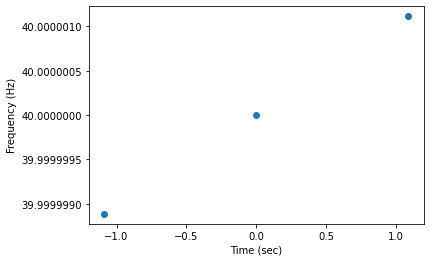

In [6]:
fig, ax = plt.subplots()
ax.scatter(bursts[0]/sec2M, bursts[1]*sec2M) #converting back to SI for the sake of plotting
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (sec)')

To view the uncertainty on these burst locations it is important to utilize `EccPrior` to plot the probability space.

In [7]:
#calulcate the probability for each t,f in the time window
ts, fs, blob_map = prior_mapping(tmin, tmax, Mtot, Mchirp, destar, tstar, fstar)

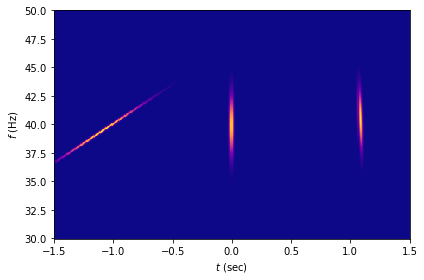

In [8]:
#Plot the prior map
prior_map_fig = plt.figure()
ax = prior_map_fig.add_subplot(111)
ax.pcolormesh(ts, fs, blob_map, cmap='plasma', shading='auto')
ax.set_xlabel(r'$t$ (sec)');
ax.set_ylabel(r'$f$ (Hz)');
plt.tight_layout()